In [3]:
import muon as mu
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
import scanpy as sc

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/si

In [4]:
trajMap_orig=mu.read_h5mu("../../important_processed_data/12.7_trajMap_v1.h5mu")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [203]:
coor_matrix=pd.read_csv("../processed_data//12.9_trajMap/12.9_coorDf.csv",index_col=0)

In [204]:
coor_matrix

Bmsc2019_Regev_b3_sep_Chondro  \
0610007N19Rik                             0.000000   
0610007P14Rik                            -0.630156   
0610009B22Rik                            -0.451588   
0610009D07Rik                             0.000000   
0610009E02Rik                             0.000000   
...                                            ...   
mt-Ty                                     0.000000   
tdT-WPRE-trans                            0.000000   
tdTomato-WPRE-trans                       0.000000   
tdtomato                                  0.000000   
tomato                                    0.000000   

                     BmscEndosteal_Ono_Fgfr3CE_sep_Chondro  \
0610007N19Rik                                     0.000000   
0610007P14Rik                                     0.000000   
0610009B22Rik                                    -0.222685   
0610009D07Rik                                     0.000000   
0610009E02Rik                                    -0.250953   
...                                                    ...   
mt-Ty                                             0.000000   
tdT-WPRE-trans                                    0.000000   
tdTomato-WPRE-trans                               0.000000   
tdtomato                                          0.000000   
tomato                                            0.000000   

                     BmscEndosteal_Ono_Fgfr3CEp53cHet_sep_Chondro  \
0610007N19Rik                                            0.000000   
0610007P14Rik                                           -0.295802   
0610009B22Rik                                           -0.146165   
0610009D07Rik                                            0.000000   
0610009E02Rik                                            0.000000   
...                                                           ...   
mt-Ty                                                    0.000000   
tdT-WPRE-trans                                          -0.237114   
tdTomato-WPRE-trans                                      0.000000   
tdtomato                                                 0.000000   
tomato                                                   0.000000   

                     BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Chondro  \
0610007N19Rik                                           0.000000   
0610007P14Rik                                          -0.405087   
0610009B22Rik                                          -0.089502   
0610009D07Rik                                           0.000000   
0610009E02Rik                                           0.000000   
...                                                          ...   
mt-Ty                                                   0.000000   
tdT-WPRE-trans                                          0.202319   
tdTomato-WPRE-trans                                     0.000000   
tdtomato                                                0.000000   
tomato                                                  0.000000   

                     BmscEndosteal_Ono_Gas1CE_sep_Chondro  \
0610007N19Rik                                    0.000000   
0610007P14Rik                                   -0.815654   
0610009B22Rik                                   -0.457936   
0610009D07Rik                                    0.000000   
0610009E02Rik                                    0.000000   
...                                                   ...   
mt-Ty                                            0.000000   
tdT-WPRE-trans                                   0.282549   
tdTomato-WPRE-trans                              0.000000   
tdtomato                                         0.000000   
tomato                                           0.000000   

                     BmscEndosteal_Ono_Prrx1cre18M_sep_Chondro  \
0610007N19Rik                                         0.000000   
0610007P14Rik                                        -0.420196   
0610009B22Rik                                     

In [209]:
coor.layers["raw"]=coor_matrix.T

In [200]:
trajMap_orig["peak"].X

array([[-0.26497427,  0.45285586, -0.07306957, ..., -0.18413442,
        -0.09090909, -0.31137633],
       [-0.26497427, -1.1707162 , -1.0203643 , ..., -0.18413442,
        -0.09090909, -0.31137633],
       [-0.26497427,  0.8587488 , -0.07306957, ..., -0.18413442,
        -0.09090909, -0.31137633],
       ...,
       [-0.26497427,  0.04696282, -0.38883445, ...,  5.385932  ,
        -0.09090909, -0.31137633],
       [-0.26497427, -1.1707162 , -1.0203643 , ..., -0.18413442,
        -0.09090909, -0.31137633],
       [-0.26497427, -1.1707162 ,  1.18999   , ..., -0.18413442,
        -0.09090909, -0.31137633]], dtype=float32)

In [6]:
travMatrix=pd.read_csv("../processed_data/12.12_TRAV/12.26_valide_origin_nmf.csv",index_col=0)

In [71]:
travMatrix=travMatrix.loc[:,trajMap_orig.obs_names]

In [73]:
adata_TRAV=ad.AnnData(travMatrix.T)

/tmp/ipykernel_3378353/1916007474.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_TRAV=ad.AnnData(travMatrix.T)


In [74]:
trajMap=mu.MuData({"coor": trajMap_orig["coor"], "expr": trajMap_orig["expr"],"peak":trajMap_orig["peak"],"TRAV":adata_TRAV})

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [75]:
coor=trajMap["coor"]
expr=trajMap["expr"]
peak=trajMap["peak"]
trav=trajMap["TRAV"]

In [76]:
coor.layers["raw"]=coor.X
expr.layers["raw"]=expr.X
peak.layers["raw"]=peak.X
trav.layers["raw"]=trav.X


In [77]:
sc.pp.scale(coor)
sc.pp.scale(expr)
sc.pp.scale(peak)
sc.pp.scale(trav)


In [78]:
sc.tl.pca(coor, n_comps=10, svd_solver="auto")
sc.pp.neighbors(coor, metric="cosine")
sc.tl.umap(coor)

In [79]:
trajMap.obs=trajMap_orig.obs

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


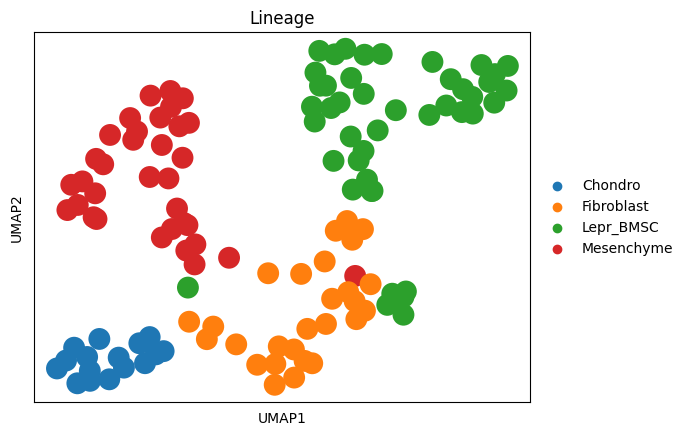

In [80]:
coor.obs=trajMap_orig.obs
sc.pl.umap(coor,color="Lineage")

In [81]:
sc.tl.pca(expr, n_comps=10, svd_solver="auto")
sc.pp.neighbors(expr, metric="cosine")
sc.tl.umap(expr)

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


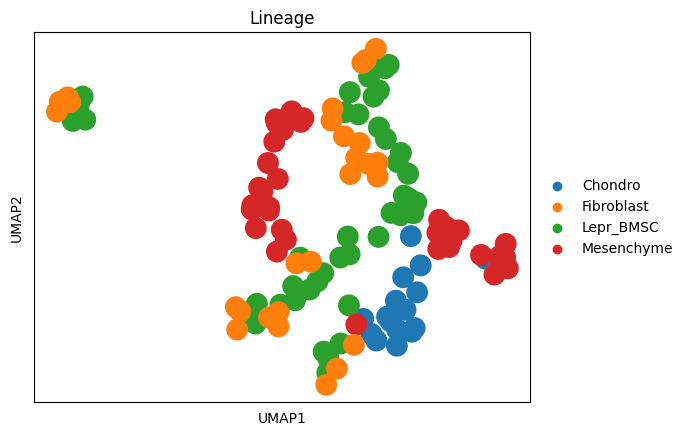

In [82]:
expr.obs=trajMap_orig.obs
sc.pl.umap(expr,color="Lineage")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


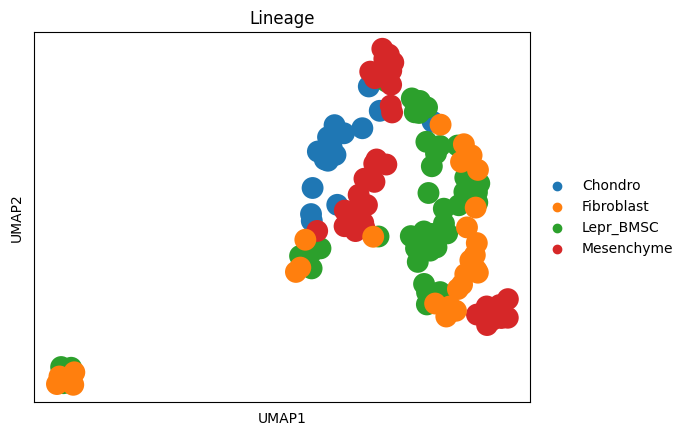

In [83]:
sc.tl.pca(peak, n_comps=10, svd_solver="auto")
sc.pp.neighbors(peak, metric="cosine")
sc.tl.umap(peak)
peak.obs=trajMap_orig.obs
sc.pl.umap(peak,color="Lineage")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


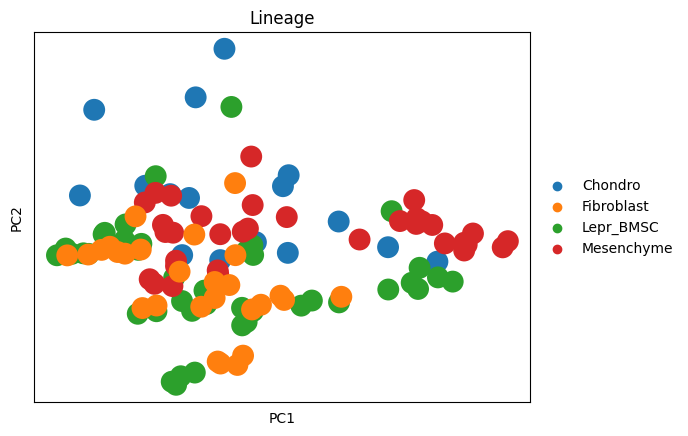

In [84]:
sc.pl.pca(expr,color="Lineage")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


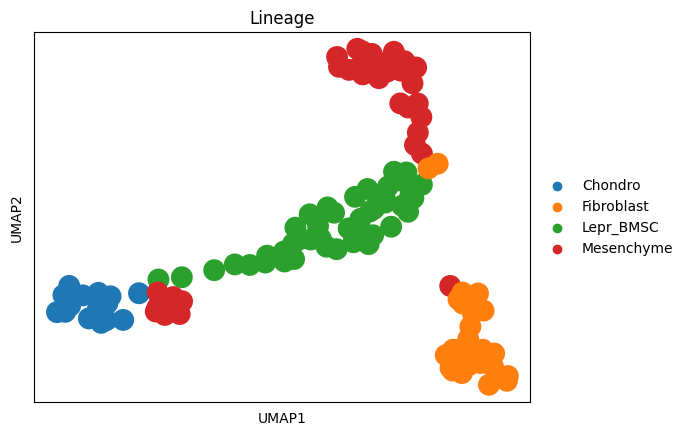

In [85]:
sc.tl.pca(trav, n_comps=10, svd_solver="auto")
sc.pp.neighbors(trav, metric="cosine")
sc.tl.umap(trav)
trav.obs=trajMap_orig.obs
sc.pl.umap(trav,color="Lineage")

In [86]:
mu.pp.neighbors(trajMap,n_multineighbors=20)

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/pynndescent/pynndescent_.py:346: NumbaWarning: Cannot cache compiled function "init_rp_tree" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_rp_tree(data, dist, current_graph, leaf_array)
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/pynndescent/pynndescent_.py:348: NumbaWarning: Cannot cache compiled function "init_random" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_random(n_neighbors, data, current_graph, dist, rng_state)
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/pynndescent/pynndescent_.py:358: NumbaWarning: Cannot cache compiled function "process_candidates" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  nn_descent_internal_low_memory_parallel(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/pynndescent/pynndescent_.py:346: NumbaWarni

In [87]:
mu.tl.umap(trajMap)

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


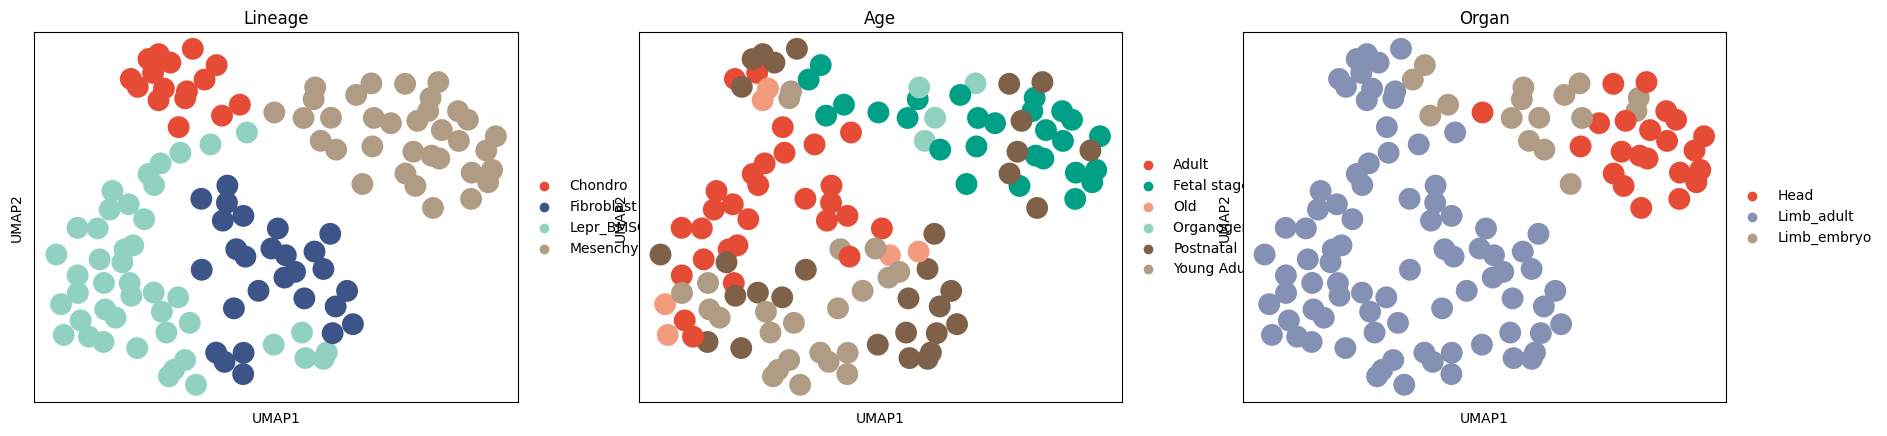

In [119]:
sc.pl.umap(trajMap,color=["Lineage","Age","Organ"])

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


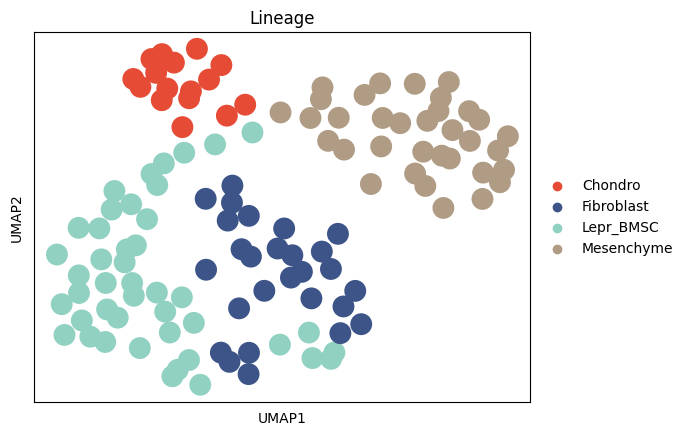

In [123]:
sc.pl.umap(trajMap,color=["Lineage"],save="lineage")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


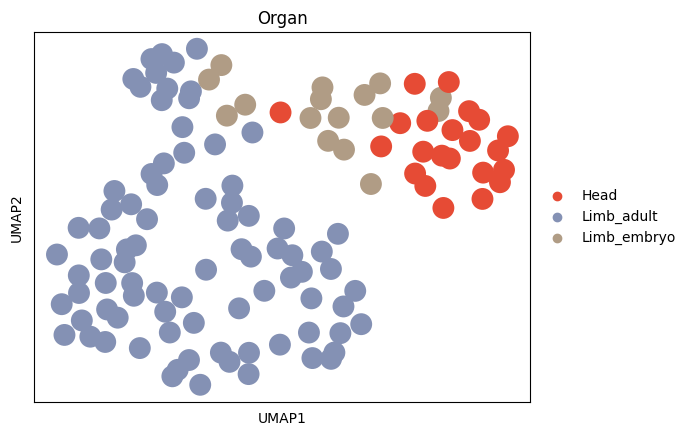

In [122]:
sc.pl.umap(trajMap,color=["Organ"],save="Organ")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


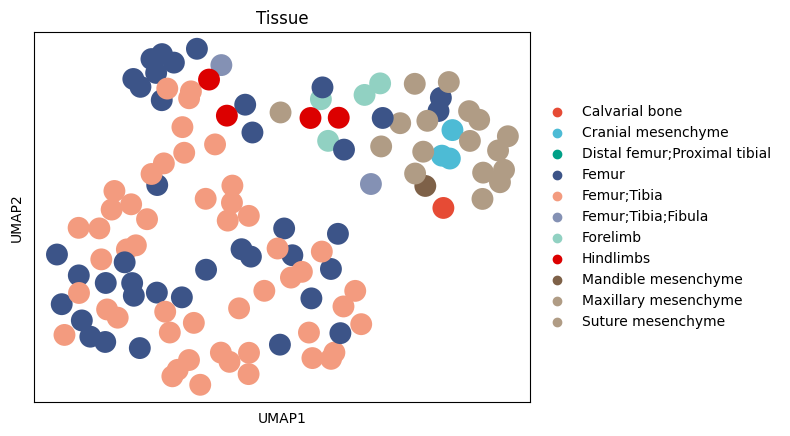

In [124]:
sc.pl.umap(trajMap,color=["Tissue"],save="Tissue",palette="npg_nrc")

In [126]:
trajMap.obs['Age']

Bmsc2019_Regev_b3_sep_Chondro                                          Adult
BmscEndosteal_Ono_Fgfr3CE_sep_Chondro                              Postnatal
BmscEndosteal_Ono_Fgfr3CEp53cHet_sep_Chondro                           Adult
BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Chondro                            Adult
BmscEndosteal_Ono_Gas1CE_sep_Chondro                               Postnatal
                                                                    ...     
Metaphysis_Yang_4_sep_Fibroblast                                   Postnatal
Metaphysis_Yang_sorted_sep_Fibroblast                              Postnatal
PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21_sep_Fibroblast      Postnatal
Septoclasts_Kishor_Longbone2_sep_Fibroblast                      Young Adult
Septoclasts_Kishor_Pdgfra_sep_Fibroblast                         Young Adult
Name: Age, Length: 121, dtype: category
Categories (6, object): ['Adult', 'Fetal stage', 'Old', 'Organogenesis stage', 'Postnatal', 'Young Adult']

In [127]:
trajMap.obs['Age'] = pd.Categorical(trajMap.obs['Age'], categories=['Organogenesis stage','Fetal stage',  'Postnatal', 'Young Adult',
                                                                    'Adult', 'Old'], ordered=True)


/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


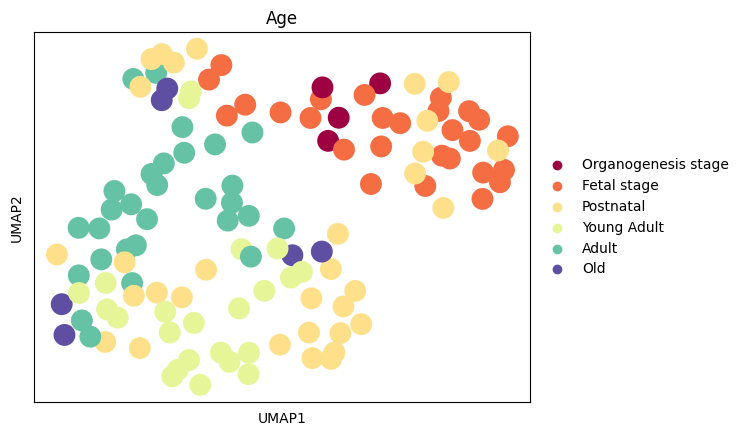

In [130]:
sc.pl.umap(trajMap,color=["Age"],save="Age",palette="Spectral")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


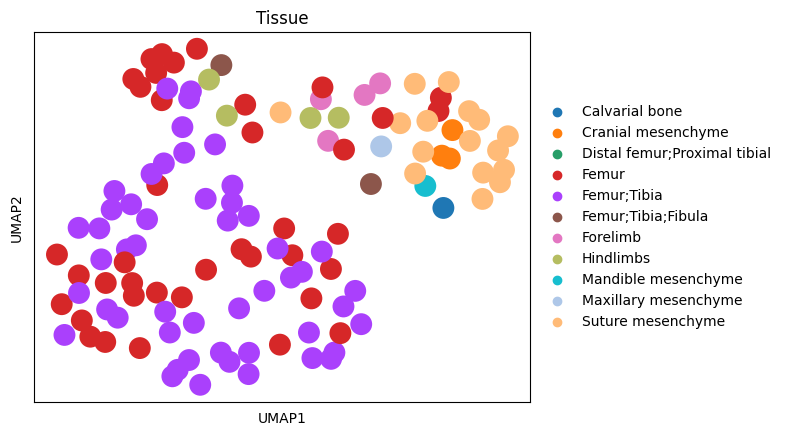

In [101]:
sc.pl.umap(trajMap,color=["Tissue"])

In [146]:
coor.layers["raw"]=trajMap_orig["coor"].X

In [ ]:
sc.pl.umap(trajMap,color="Tissue.s")

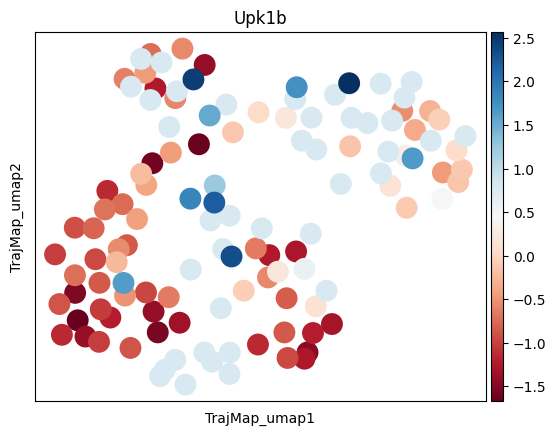

In [164]:
sc.pl.embedding(coor,color="Upk1b",basis="TrajMap_umap",cmap="RdBu",layer="raw",save="Upk1b_coor")

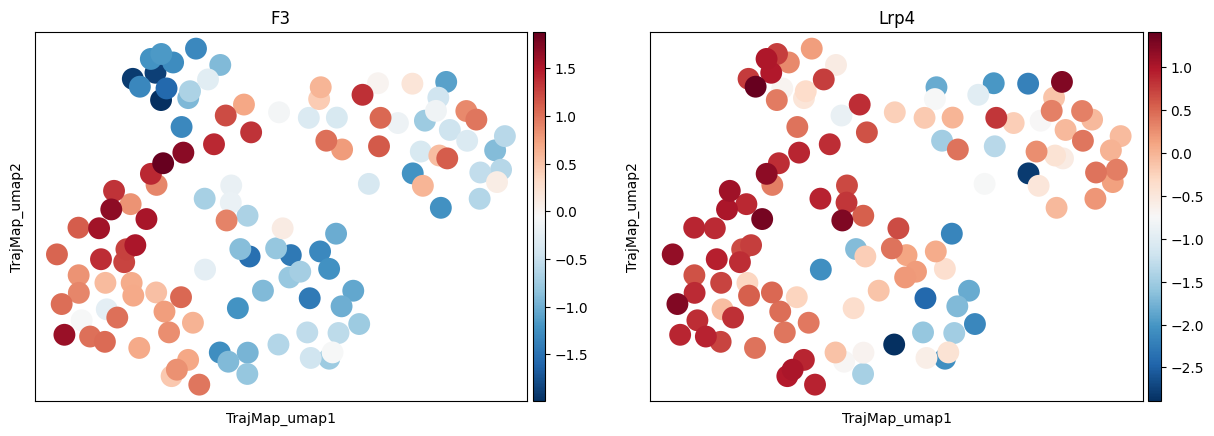

In [170]:
sc.pl.embedding(coor,color=["F3","Lrp4"],basis="TrajMap_umap",cmap="RdBu_r",layer="raw",save="RAV143_gene")

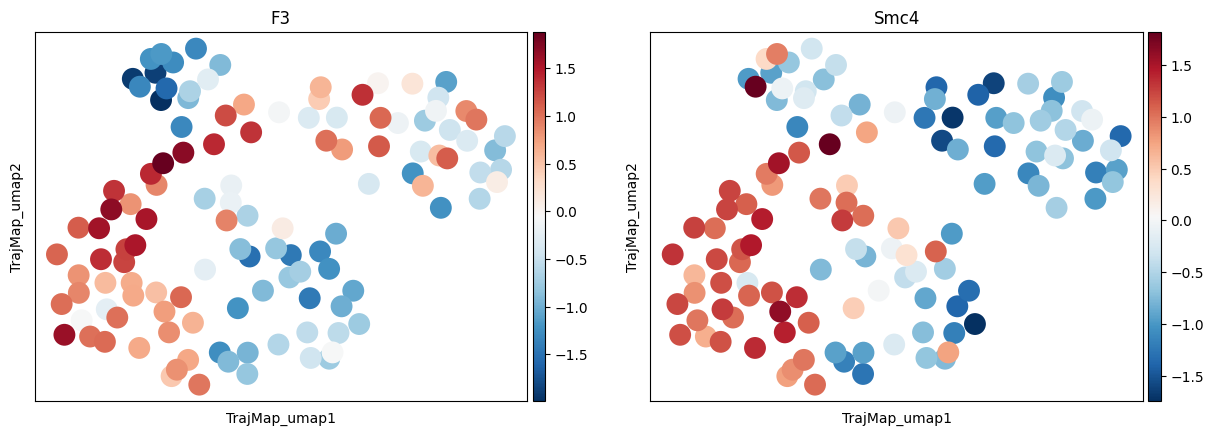

In [178]:
sc.pl.embedding(coor,color=["F3","Smc4"],basis="TrajMap_umap",cmap="RdBu_r",layer="raw")

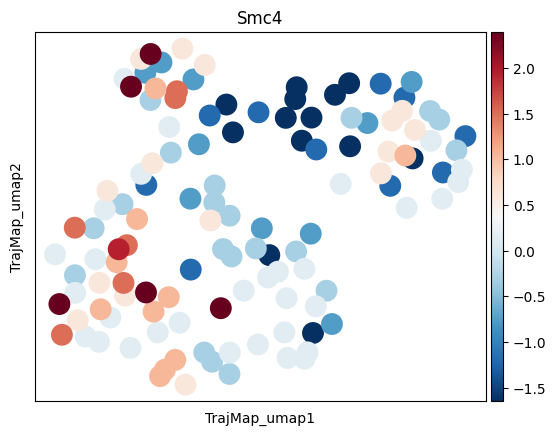

In [177]:
sc.pl.embedding(peak,color=["Smc4"],basis="TrajMap_umap",cmap="RdBu_r",layer="raw",save="F3_peak")

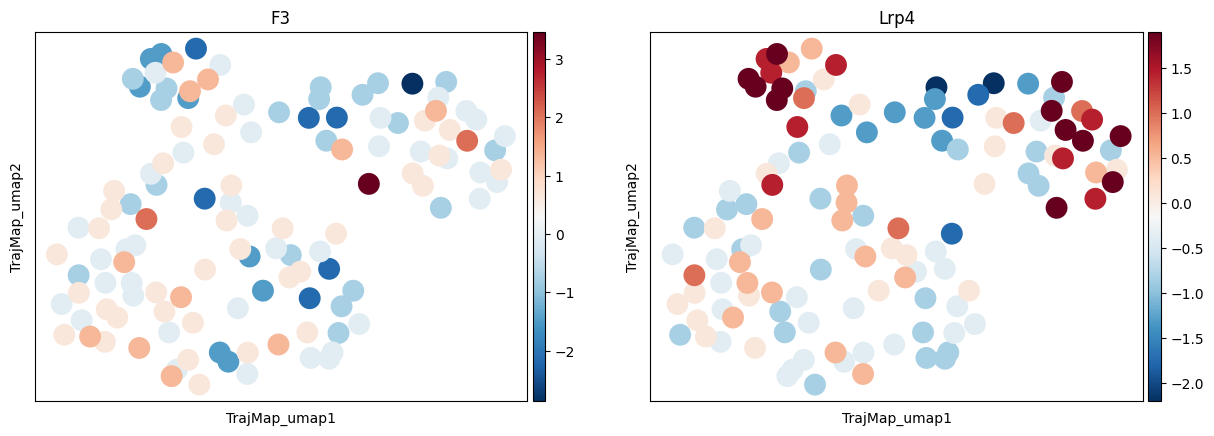

In [168]:
sc.pl.embedding(peak,color=["F3","Lrp4"],basis="TrajMap_umap",cmap="RdBu_r",layer="raw")

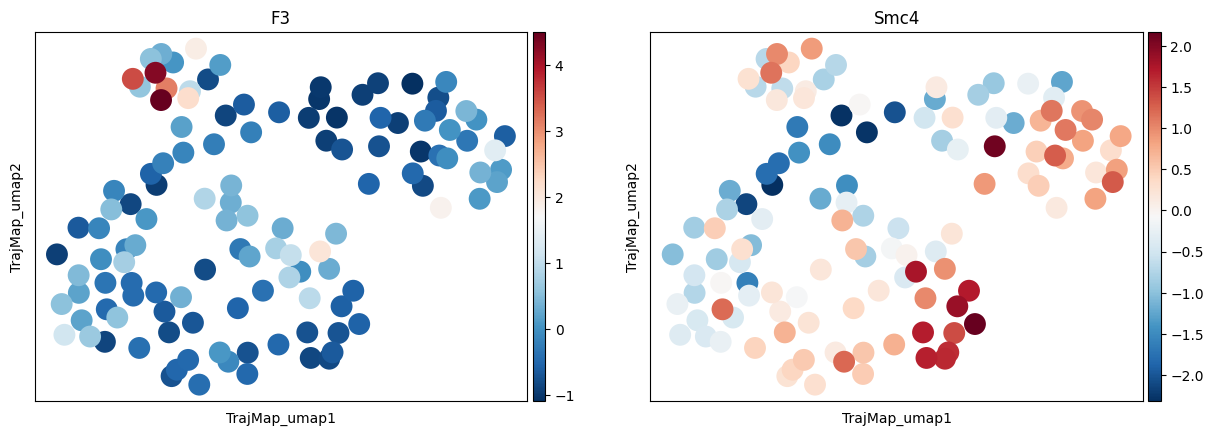

In [181]:
sc.pl.embedding(expr,color=["F3","Smc4"],basis="TrajMap_umap",cmap="RdBu_r",layer="raw")

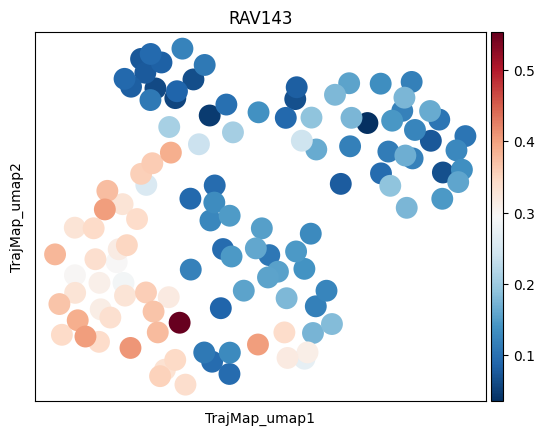

In [266]:
sc.pl.embedding(trav,color="RAV143",basis="TrajMap_umap",cmap="RdBu_r",layer="raw",save="Lepr_143")

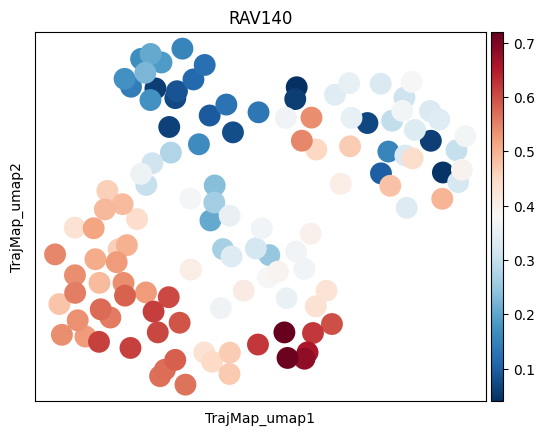

In [265]:
sc.pl.embedding(trav,color="RAV140",basis="TrajMap_umap",cmap="RdBu_r",layer="raw",save="RAV140")

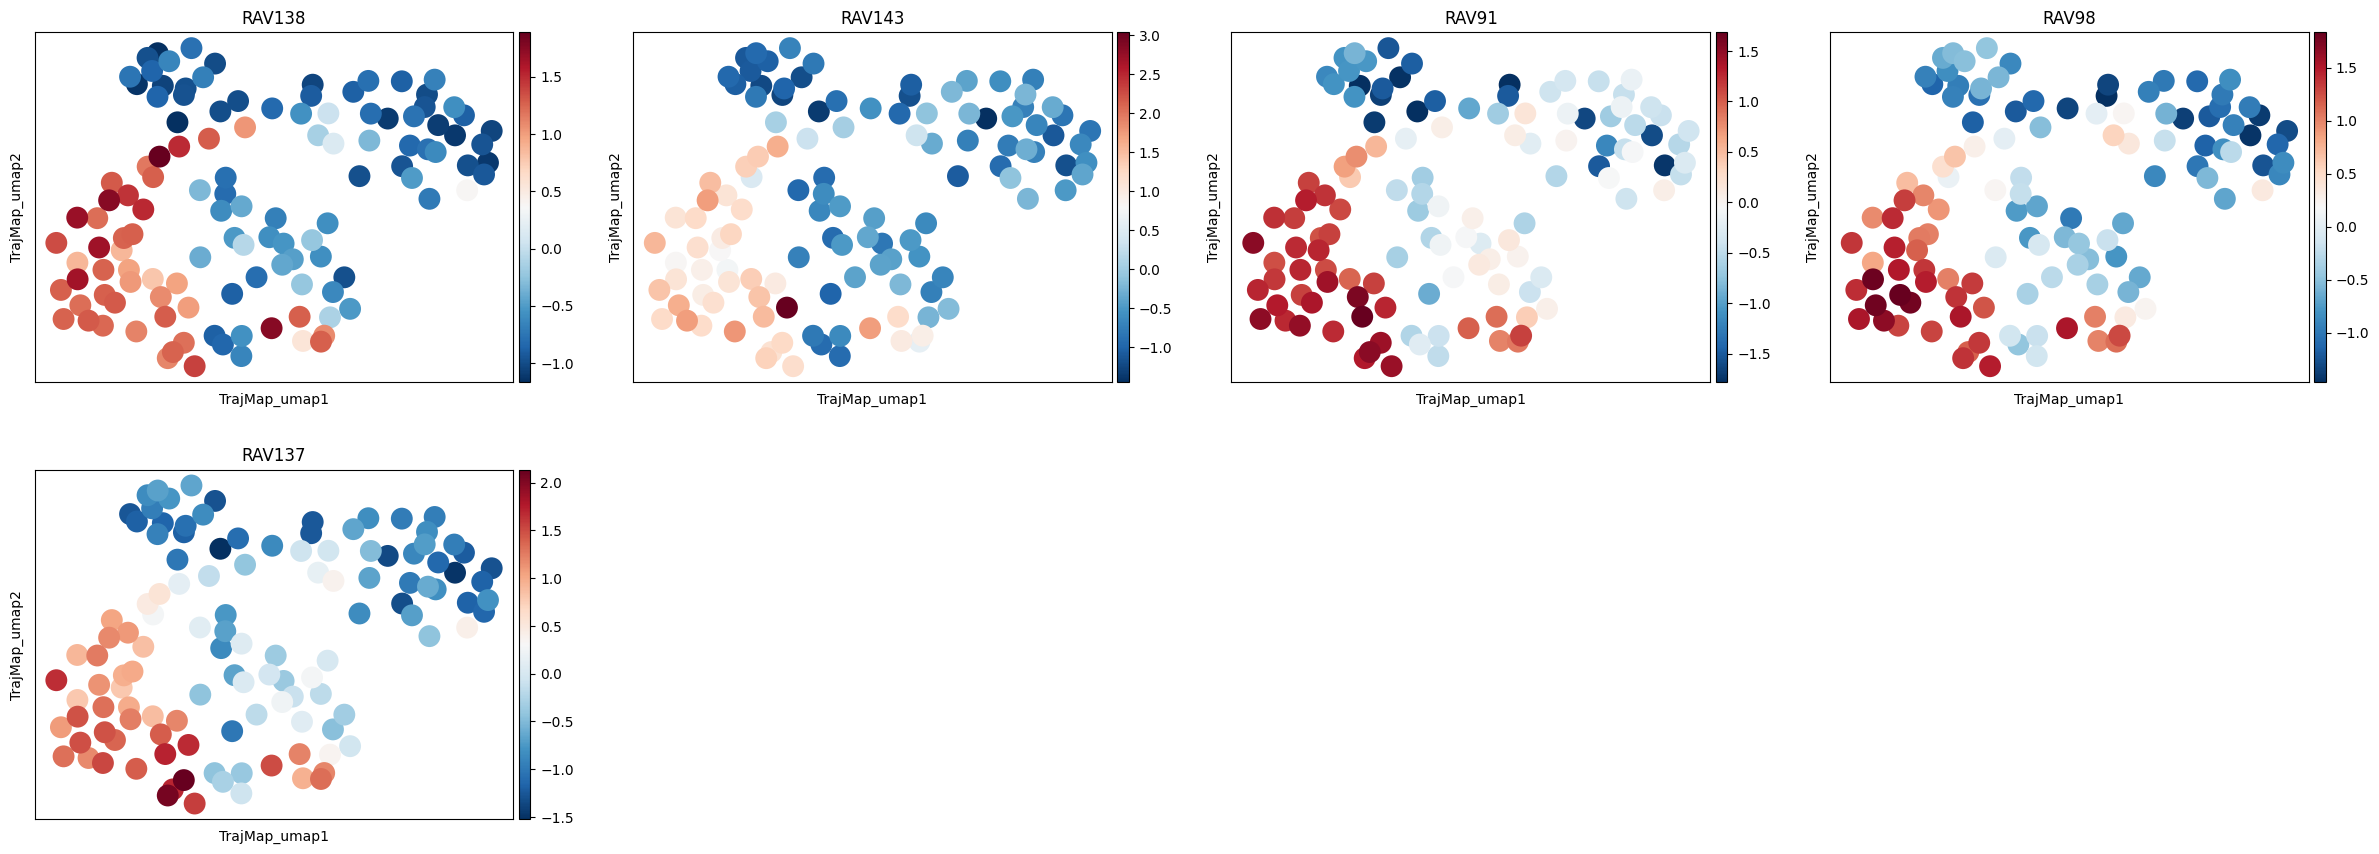

In [159]:
sc.pl.embedding(trav,color=["RAV138","RAV143","RAV91","RAV98","RAV137"],basis="TrajMap_umap",cmap="RdBu_r",layer="raw")

In [187]:
trav.layers["raw"]=travMatrix.T

In [186]:
travMatrix

Bmsc2019_Regev_b3_sep_Chondro  BmscEndosteal_Ono_Fgfr3CE_sep_Chondro  \
RAV1                         0.063320                               0.090982   
RAV2                         0.057220                               0.112467   
RAV3                         0.037940                               0.086911   
RAV4                         0.161865                               0.174462   
RAV5                         0.060103                               0.087300   
...                               ...                                    ...   
RAV222                       0.058741                               0.128324   
RAV223                       0.039614                               0.055149   
RAV224                       0.045172                               0.042614   
RAV225                       0.061240                               0.084857   
RAV226                       0.044417                               0.026249   

        BmscEndosteal_Ono_Fgfr3CEp53cHet_sep_Chondro  \
RAV1                                        0.125970   
RAV2                                        0.120252   
RAV3                                        0.093176   
RAV4                                        0.259023   
RAV5                                        0.099913   
...                                              ...   
RAV222                                      0.240619   
RAV223                                      0.118371   
RAV224                                      0.094987   
RAV225                                      0.078265   
RAV226                                      0.064891   

        BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Chondro  \
RAV1                                       0.130884   
RAV2                                       0.100288   
RAV3                                       0.095880   
RAV4                                       0.261902   
RAV5                                       0.140169   
...                                             ...   
RAV222                                     0.303677   
RAV223                                     0.161909   
RAV224                                     0.118720   
RAV225                                     0.086629   
RAV226                                     0.045757   

        BmscEndosteal_Ono_Gas1CE_sep_Chondro  \
RAV1                                0.235186   
RAV2                                0.092389   
RAV3                                0.058677   
RAV4                                0.403215   
RAV5                                0.087738   
...                                      ...   
RAV222                              0.255397   
RAV223                              0.154337   
RAV224                              0.069470   
RAV225                              0.059803   
RAV226                              0.080021   

        BmscEndosteal_Ono_Prrx1cre18M_sep_Chondro  \
RAV1                                     0.105715   
RAV2                                     0.076760   
RAV3                                     0.079873   
RAV4                                     0.217707   
RAV5                                     0.138392   
...                                           ...   
RAV222                                   0.218728   
RAV223                                   0.109571   
RAV224                                   0.048723   
RAV225                                   0.082090   
RAV226                                   0.067122   

        BmscEndosteal_Ono_Prrx1creP21_sep_Chondro  \
RAV1                                     0.173545   
RAV2                                     0.108506   
RAV3                                     0.103855   
RAV4                                     0.397716   
RAV5                                     0.149664   
...                                           ...   
RAV222                                   0.307786   
RAV223                                   0.133264   
RAV224                

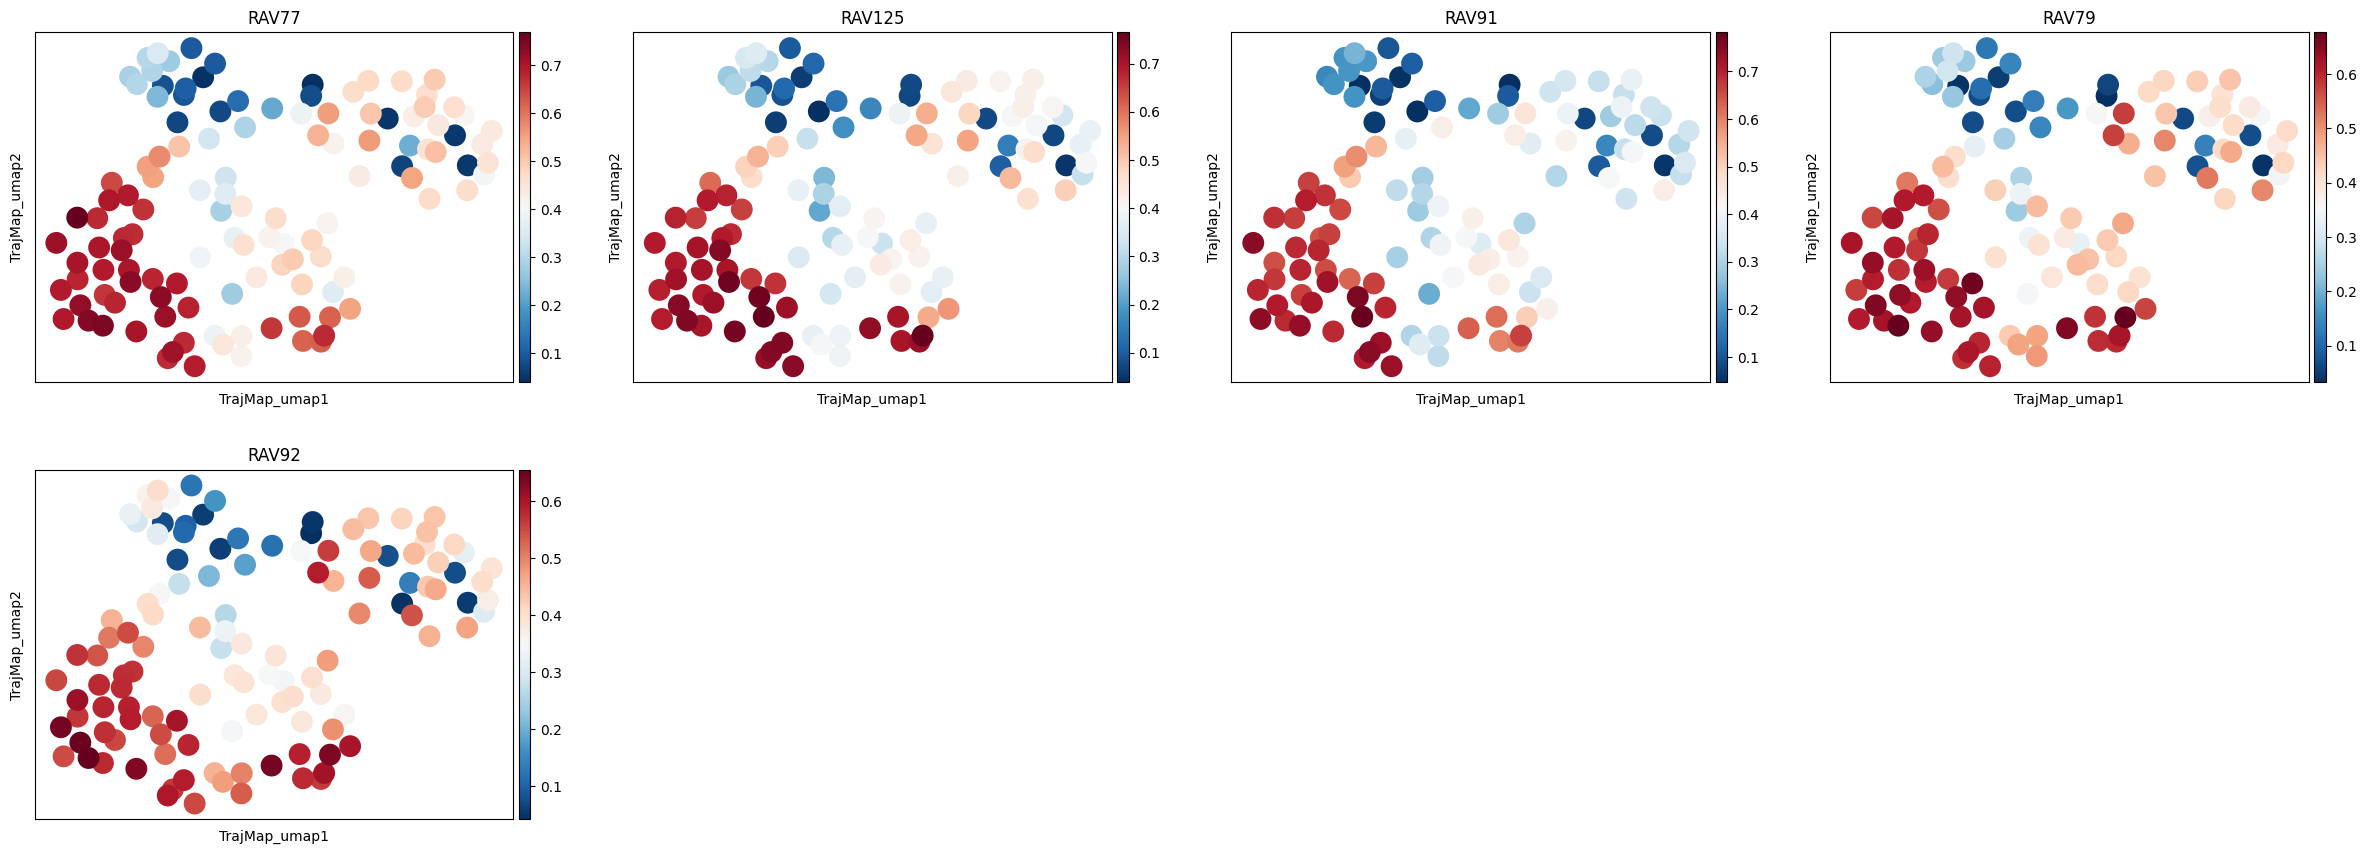

In [190]:
sc.pl.embedding(trav,color=["RAV77","RAV125","RAV91","RAV79","RAV92"],basis="TrajMap_umap",cmap="RdBu_r",layer="raw")

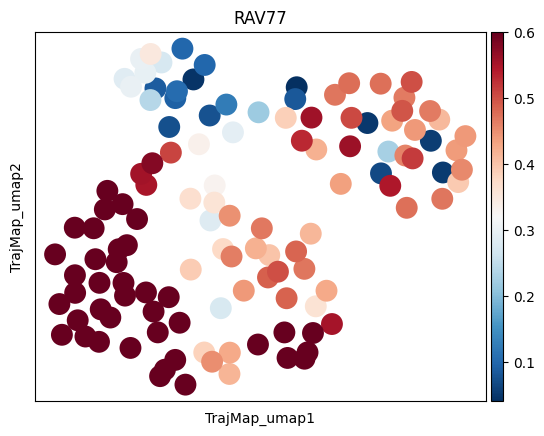

In [216]:
sc.pl.embedding(trav,color=["RAV77"],basis="TrajMap_umap",cmap="RdBu_r",layer="raw",vmax=0.6,save="RAV77")

In [234]:
trav.obs["Lineage"].astype(str) + trav.obs["Age"].astype(str) 

Bmsc2019_Regev_b3_sep_Chondro                                             ChondroAdult
BmscEndosteal_Ono_Fgfr3CE_sep_Chondro                                 ChondroPostnatal
BmscEndosteal_Ono_Fgfr3CEp53cHet_sep_Chondro                              ChondroAdult
BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Chondro                               ChondroAdult
BmscEndosteal_Ono_Gas1CE_sep_Chondro                                  ChondroPostnatal
                                                                         ...          
Metaphysis_Yang_4_sep_Fibroblast                                   FibroblastPostnatal
Metaphysis_Yang_sorted_sep_Fibroblast                              FibroblastPostnatal
PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21_sep_Fibroblast      FibroblastPostnatal
Septoclasts_Kishor_Longbone2_sep_Fibroblast                      FibroblastYoung Adult
Septoclasts_Kishor_Pdgfra_sep_Fibroblast                         FibroblastYoung Adult
Length: 121, dtype: object

In [235]:
trav.obs["Age_OPC"]=trav.obs["Lineage"].astype(str) + "_" + trav.obs["Age"].astype(str) 

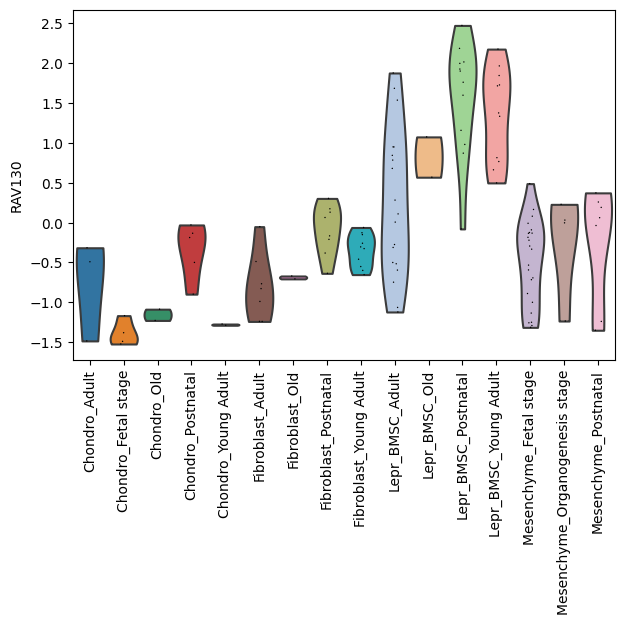

In [239]:
sc.pl.violin(trav,"RAV130",groupby="Age_OPC",rotation=90)

In [ ]:
sc.pl.violin(trav,"RAV130",groupby="Age_OPC",rotation=90)

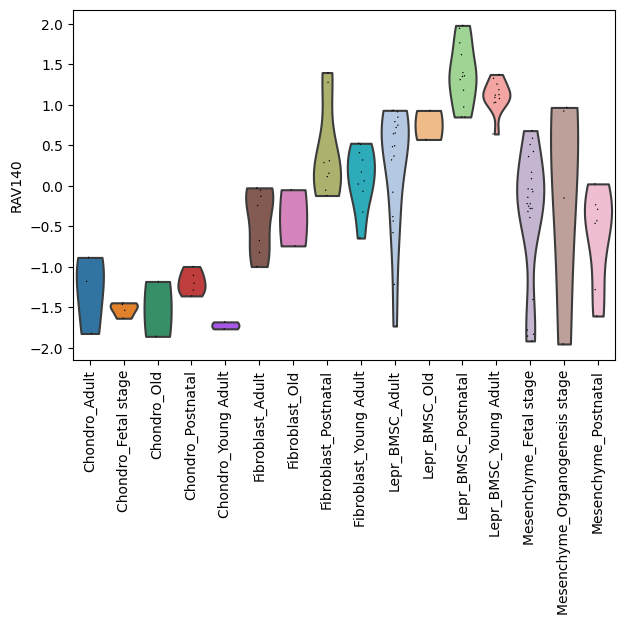

In [242]:
sc.pl.violin(trav,"RAV140",groupby="Age_OPC",rotation=90)

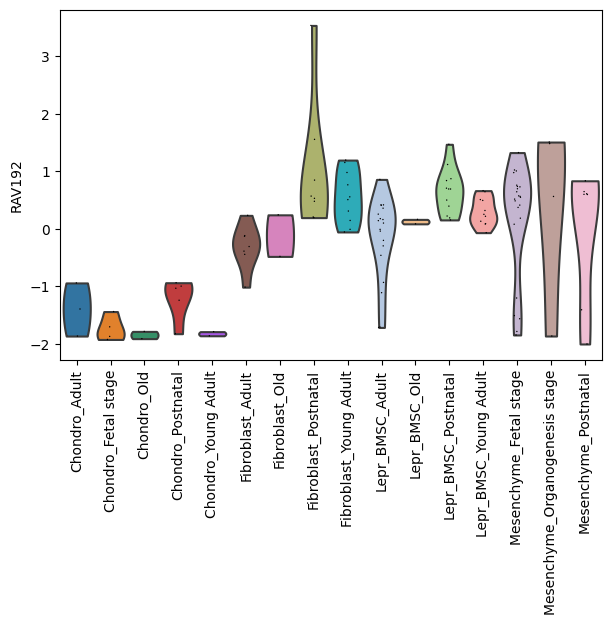

In [245]:
sc.pl.violin(trav,"RAV192",groupby="Age_OPC",rotation=90)

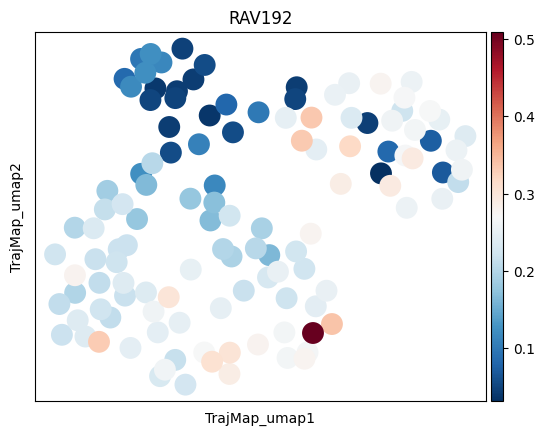

In [263]:
sc.pl.embedding(trav,color=["RAV192"],basis="TrajMap_umap",cmap="RdBu_r",layer="raw")

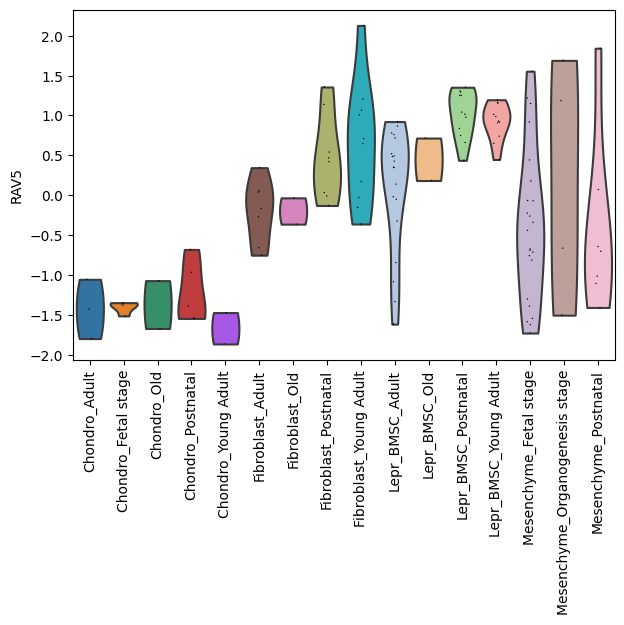

In [246]:
sc.pl.violin(trav,"RAV5",groupby="Age_OPC",rotation=90)

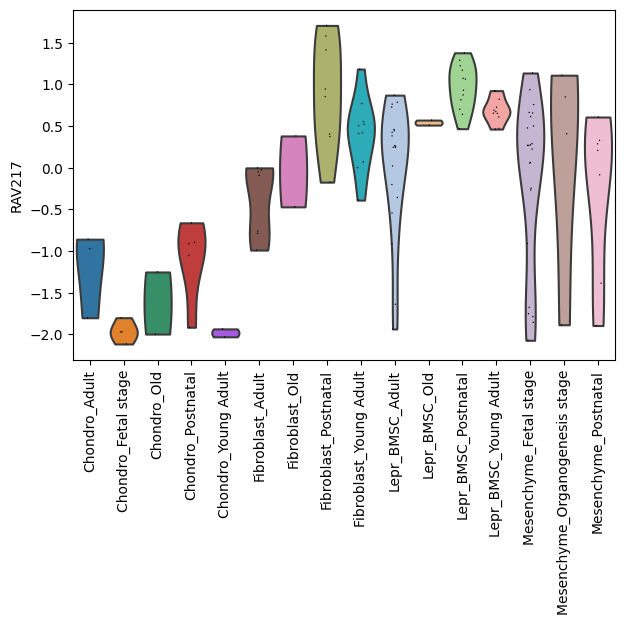

In [249]:
sc.pl.violin(trav,"RAV217",groupby="Age_OPC",rotation=90)

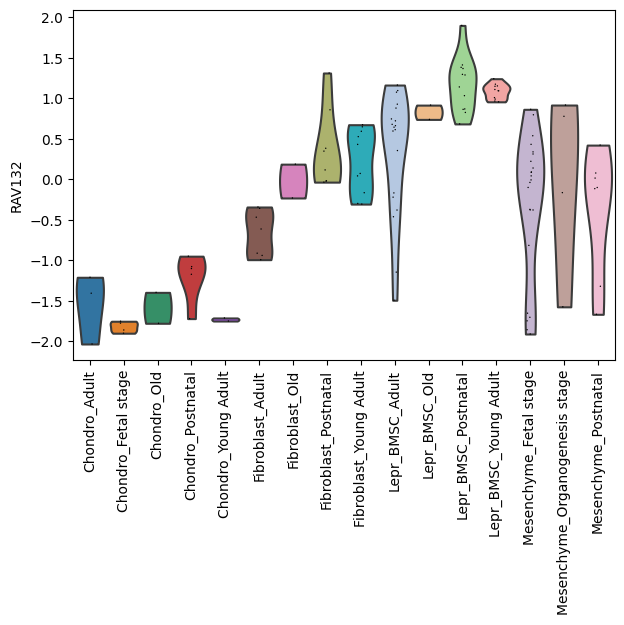

In [251]:
sc.pl.violin(trav,"RAV132",groupby="Age_OPC",rotation=90)

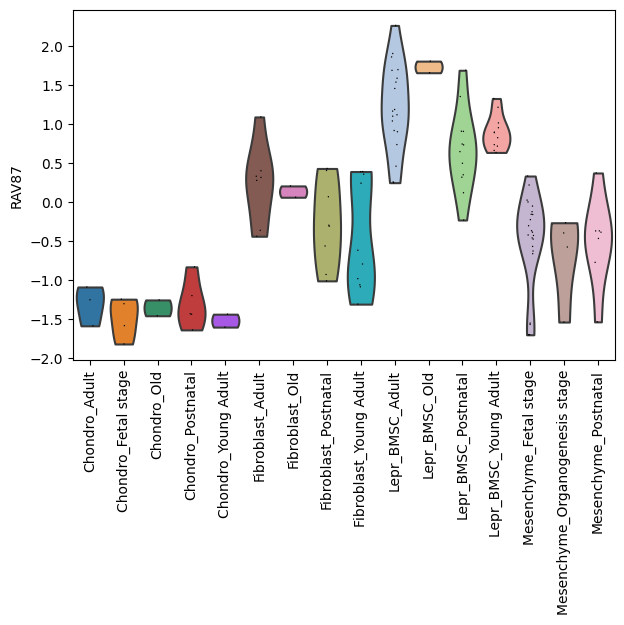

In [256]:
sc.pl.violin(trav,"RAV87",groupby="Age_OPC",rotation=90)

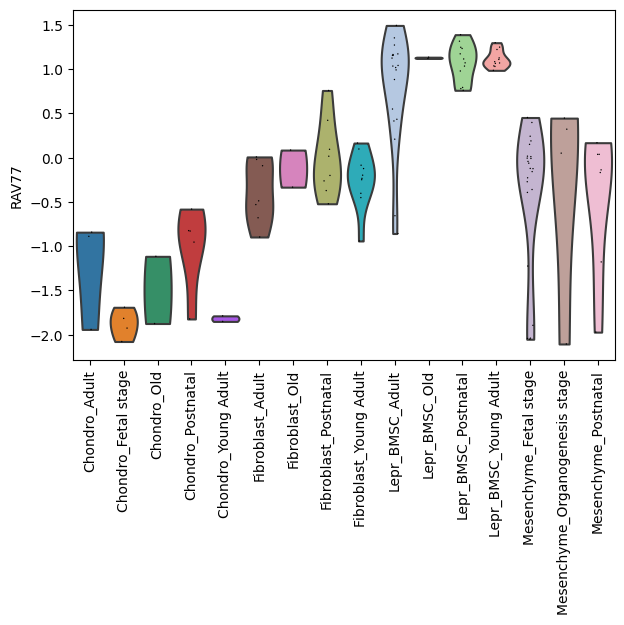

In [262]:
sc.pl.violin(trav,"RAV77",groupby="Age_OPC",rotation=90)

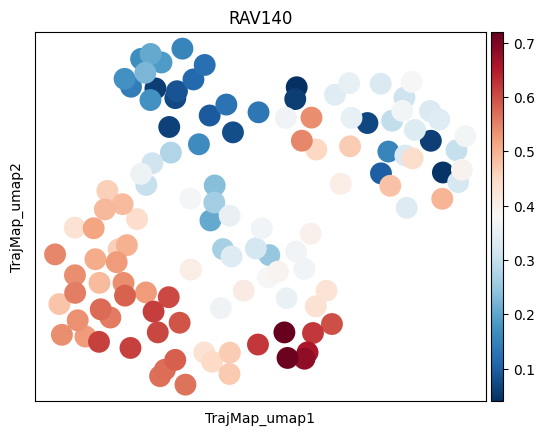

In [222]:
sc.pl.embedding(trav,color=["RAV140"],basis="TrajMap_umap",cmap="RdBu_r",layer="raw")

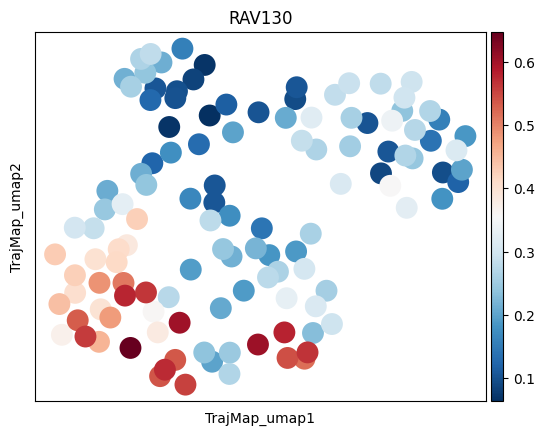

In [227]:
sc.pl.embedding(trav,color=["RAV130"],basis="TrajMap_umap",cmap="RdBu_r",layer="raw")

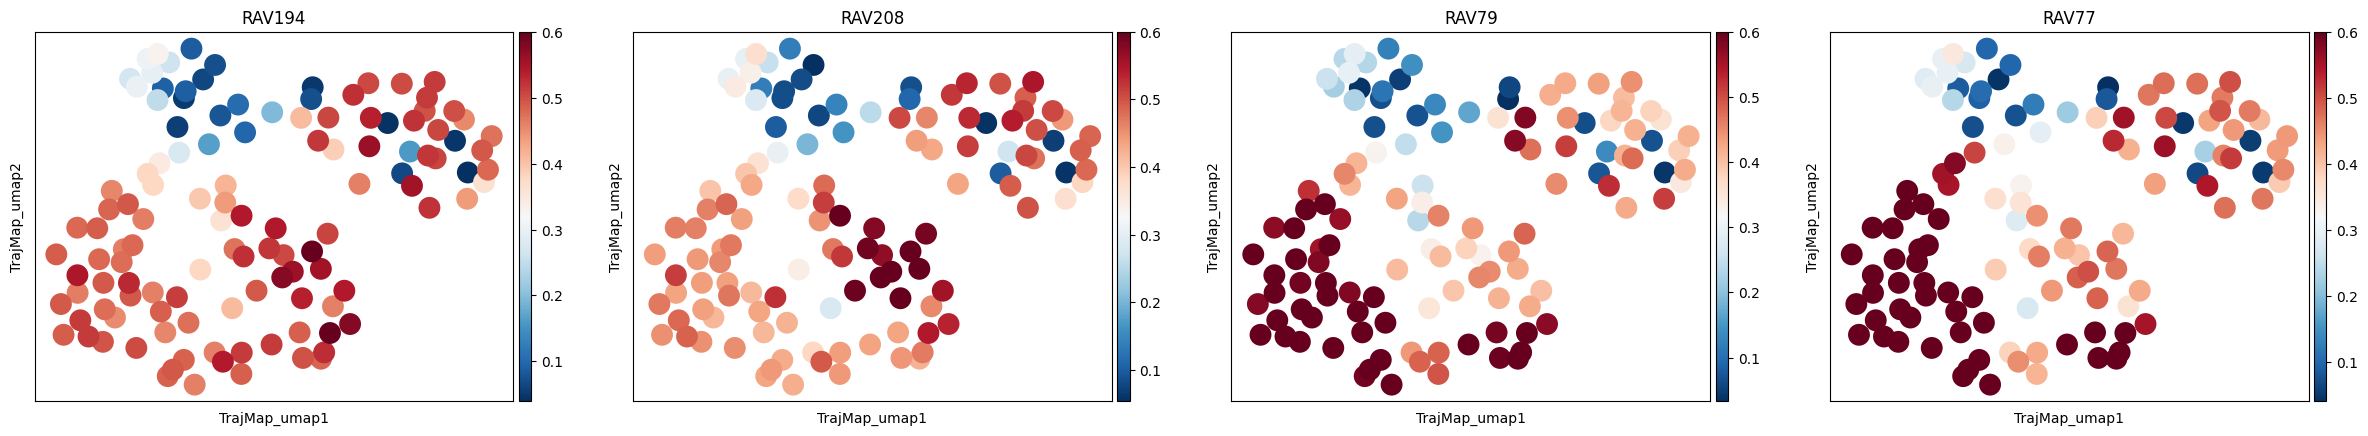

In [194]:
sc.pl.embedding(trav,color=["RAV194","RAV208","RAV79","RAV77"],basis="TrajMap_umap",cmap="RdBu_r",layer="raw",vmax=0.6)

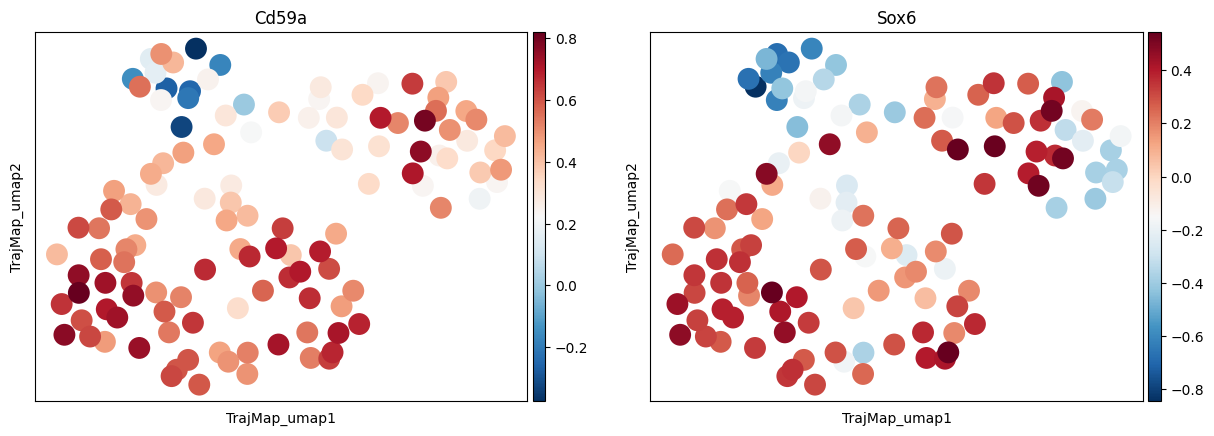

In [213]:
sc.pl.embedding(coor,color=["Cd59a","Sox6"],basis="TrajMap_umap",cmap="RdBu_r",layer="raw",save="trav77_gene")

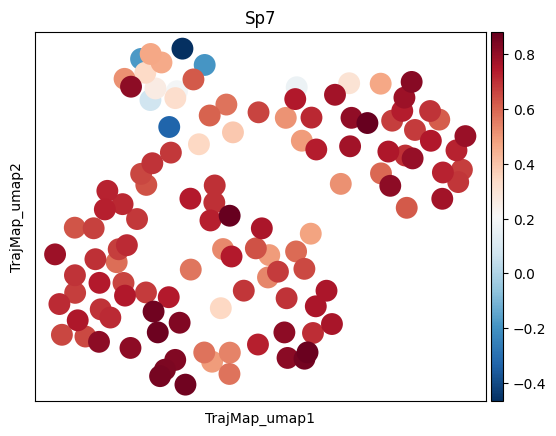

In [211]:
sc.pl.embedding(coor,color=["Sp7"],basis="TrajMap_umap",cmap="RdBu_r",layer="raw")

In [179]:
coor.obsm["TrajMap_umap"]=trajMap.obsm["X_umap"]
trav.obsm["TrajMap_umap"]=trajMap.obsm["X_umap"]
peak.obsm["TrajMap_umap"]=trajMap.obsm["X_umap"]
expr.obsm["TrajMap_umap"]=trajMap.obsm["X_umap"]

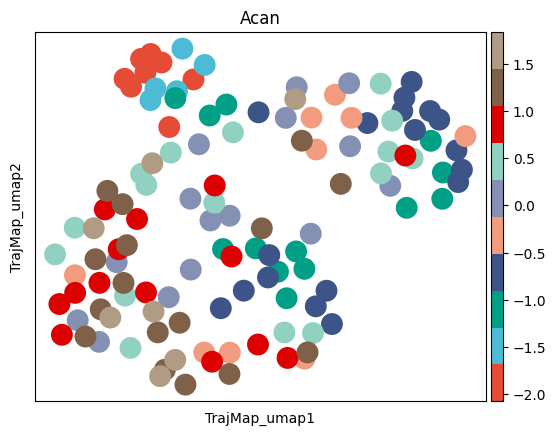

In [134]:
sc.pl.embedding(coor,color="Acan",basis="TrajMap_umap")

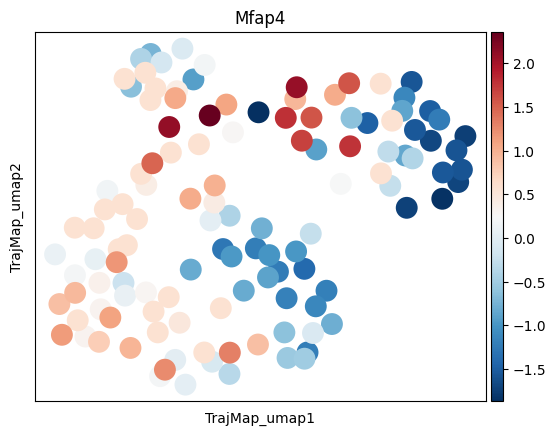

In [92]:
sc.pl.embedding(coor,color="Mfap4",basis="TrajMap_umap",cmap="RdBu_r")

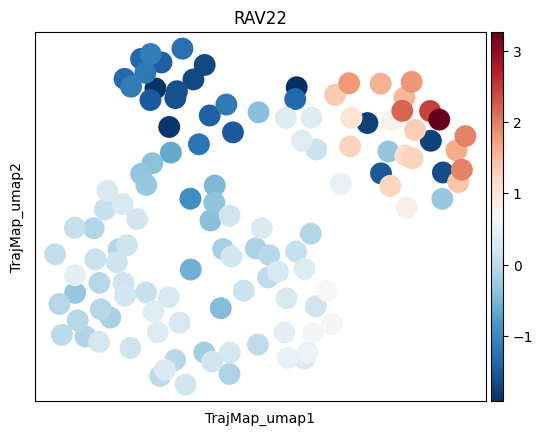

In [91]:
sc.pl.embedding(trav,color="RAV22",basis="TrajMap_umap",cmap="RdBu_r")

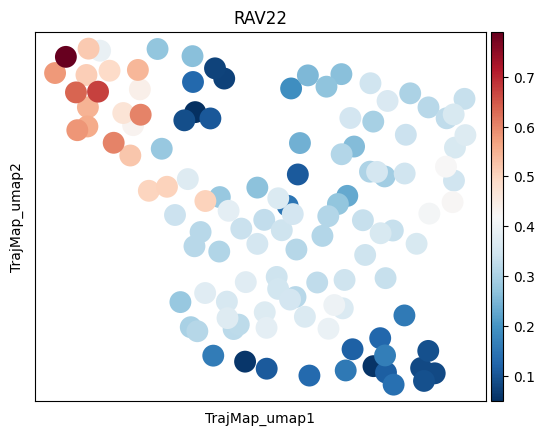

In [63]:
sc.pl.embedding(trav,color="RAV22",basis="TrajMap_umap",cmap="RdBu_r",layer="raw")

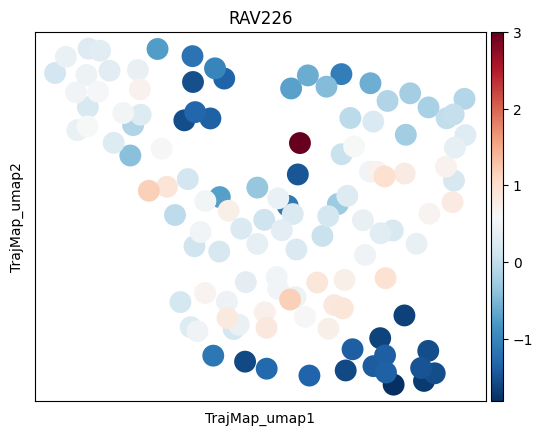

In [60]:
sc.pl.embedding(trav,color="RAV226",basis="TrajMap_umap",cmap="RdBu_r",vmax=3)

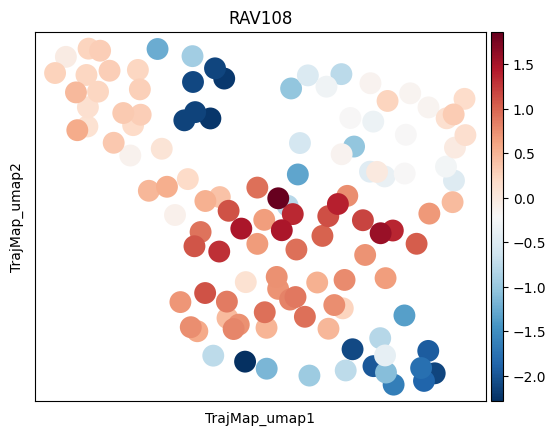

In [54]:
sc.pl.embedding(trav,color="RAV108",basis="TrajMap_umap",cmap="RdBu_r")

In [268]:
trajMap.write_h5ad("../../important_processed_data/12.30_trav.h5ad")

In [270]:
trajMap.write_h5mu("../../important_processed_data/12.30_trajMap.h5mu")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [49]:
trav.X[1:10,1:10]

array([[ 0.6914631 ,  0.6721831 ,  0.5667902 , -0.3403231 ,  0.5870988 ,
        -0.28959727,  4.952518  ,  0.32595664,  2.0353055 ],
       [ 1.9621176 ,  1.4496701 ,  2.453768  , -0.22531742,  1.6688703 ,
         0.18172996,  0.5585546 ,  1.1126422 ,  0.710058  ],
       [ 1.9940665 ,  2.6610155 ,  2.2003489 , -0.2616317 ,  1.6434098 ,
         0.10713656,  0.39502943,  1.3140571 ,  0.8920717 ],
       [ 0.27228388,  0.7839526 , -0.14672579,  1.6904031 ,  0.09134895,
         0.3731841 ,  0.96745676, -0.31479675,  0.29529878],
       [ 0.98811114,  0.2665364 ,  2.048298  , -0.66457444,  1.5835485 ,
         0.11678416,  0.22471036,  1.8899566 ,  0.6714506 ],
       [ 1.7161436 ,  1.0162706 ,  2.5773246 ,  0.17872791,  1.6676368 ,
         0.21968883,  0.88069224,  1.4658576 ,  1.1167662 ],
       [-1.6933373 , -1.5914656 , -1.5398995 , -1.5447173 , -1.7134143 ,
        -1.9567906 , -0.99893206, -1.6963047 , -1.695281  ],
       [-1.8521069 , -1.764254  , -1.8360204 , -1.3908154 , -1

In [53]:
trav.layers["raw"][1:10,1:10]

array([[0.38664124, 0.32601913, 0.37536067, 0.21711622, 0.48762311,
        0.29405831, 0.69446824, 0.22225297, 0.46241239],
       [0.55687858, 0.41416851, 0.62321856, 0.22950407, 0.65913176,
        0.35353777, 0.27470063, 0.28959967, 0.32231526],
       [0.56115893, 0.55150761, 0.58993148, 0.22559248, 0.65509516,
        0.3441244 , 0.25907863, 0.30684243, 0.34155663],
       [0.33048123, 0.33869126, 0.28163906, 0.43585628, 0.40902481,
        0.37769845, 0.31376421, 0.16739925, 0.27846942],
       [0.42638499, 0.28002802, 0.56995934, 0.18218942, 0.64560451,
        0.3453419 , 0.24280757, 0.35614411, 0.3182339 ],
       [0.52392393, 0.36503086, 0.63944794, 0.27302591, 0.65893619,
        0.35832803, 0.30547535, 0.31983778, 0.36531   ],
       [0.06713496, 0.06937277, 0.09864323, 0.08738466, 0.12288994,
        0.08366577, 0.12590959, 0.04913092, 0.06803738],
       [0.04586363, 0.04978251, 0.05974723, 0.10396223, 0.07756736,
        0.05976585, 0.09643134, 0.07141776, 0.04598018],


In [52]:
trav.layers["raw"]=travMatrix.T

(array([380040.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0., 191856.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0., 202150.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 230836.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0., 185814.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0., 170777.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0., 150399.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
        132074.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0., 135324.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0., 144215.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

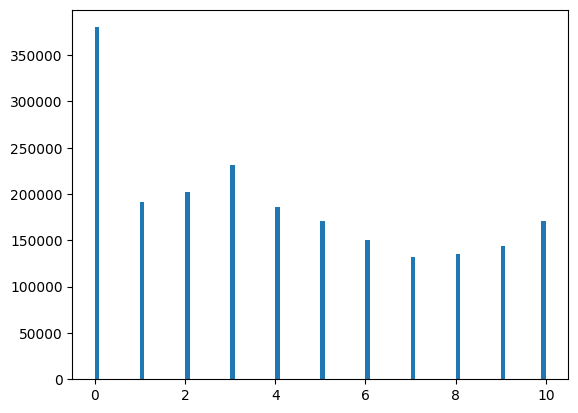

In [77]:

plt.hist(peak.X.flatten(),bins=100)

In [65]:
trajMap

MuData object with n_obs × n_vars = 121 × 52162
  4 modalities
    coor:	121 x 17312
    expr:	121 x 17312
    peak:	121 x 17312
    TRAV:	121 x 226

In [48]:
travMatrix.loc[:,trajMap.obs_names]

Bmsc2019_Regev_b3_sep_Chondro  BmscEndosteal_Ono_Fgfr3CE_sep_Chondro  \
1                         0.063320                               0.090982   
2                         0.057220                               0.112467   
3                         0.037940                               0.086911   
4                         0.161865                               0.174462   
5                         0.060103                               0.087300   
..                             ...                                    ...   
222                       0.058741                               0.128324   
223                       0.039614                               0.055149   
224                       0.045172                               0.042614   
225                       0.061240                               0.084857   
226                       0.044417                               0.026249   

     BmscEndosteal_Ono_Fgfr3CEp53cHet_sep_Chondro  \
1                                        0.125970   
2                                        0.120252   
3                                        0.093176   
4                                        0.259023   
5                                        0.099913   
..                                            ...   
222                                      0.240619   
223                                      0.118371   
224                                      0.094987   
225                                      0.078265   
226                                      0.064891   

     BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Chondro  \
1                                       0.130884   
2                                       0.100288   
3                                       0.095880   
4                                       0.261902   
5                                       0.140169   
..                                           ...   
222                                     0.303677   
223                                     0.161909   
224                                     0.118720   
225                                     0.086629   
226                                     0.045757   

     BmscEndosteal_Ono_Gas1CE_sep_Chondro  \
1                                0.235186   
2                                0.092389   
3                                0.058677   
4                                0.403215   
5                                0.087738   
..                                    ...   
222                              0.255397   
223                              0.154337   
224                              0.069470   
225                              0.059803   
226                              0.080021   

     BmscEndosteal_Ono_Prrx1cre18M_sep_Chondro  \
1                                     0.105715   
2                                     0.076760   
3                                     0.079873   
4                                     0.217707   
5                                     0.138392   
..                                         ...   
222                                   0.218728   
223                                   0.109571   
224                                   0.048723   
225                                   0.082090   
226                                   0.067122   

     BmscEndosteal_Ono_Prrx1creP21_sep_Chondro  \
1                                     0.173545   
2                                     0.108506   
3                                     0.103855   
4                                     0.397716   
5                                     0.149664   
..                                         ...   
222                                   0.307786   
223                                   0.133264   
224                                   0.109501   
225                                   0.118055   
226                                   0.060451   

     BmscEndosteal_Ono_Prrx1creP21multiome_sep_Chondro  \
1                

In [51]:
trajMap["coor"].X

array([[ 0.        , -0.63015634, -0.4515884 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.22268529, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.29580247, -0.14616491, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , -0.2530564 ,  0.34901035, ...,  0.6736818 ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.20156987, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.19875884, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [22]:
from itertools import compress
"chondro",list(compress(attr1,[(i == "Chondro") for i in attr2]))

['Bmsc2019_Regev_b3',
 'BmscEndosteal_Ono_Fgfr3CE',
 'BmscEndosteal_Ono_Fgfr3CEp53cHet',
 'BmscEndosteal_Ono_Fgfr3CEp53cKO',
 'BmscEndosteal_Ono_Gas1CE',
 'BmscEndosteal_Ono_Prrx1cre18M',
 'BmscEndosteal_Ono_Prrx1creP21',
 'BmscEndosteal_Ono_Prrx1creP21multiome',
 'BmscTime_Zhong_16M',
 'BmscTime_Zhong_1M',
 'BmscTime_Zhong_3M',
 'ChondroOsteo_Long',
 'LimbG610C_Gorrell_femurWT2',
 'LimbMouse2019_Kelly_E15',
 'PerichondrialE13.5_Matsuacshita',
 'PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21']

In [23]:
attr1

['Bmsc2019_Regev_b3',
 'BmscEndosteal_Ono_Fgfr3CE',
 'BmscEndosteal_Ono_Fgfr3CEp53cHet',
 'BmscEndosteal_Ono_Fgfr3CEp53cKO',
 'BmscEndosteal_Ono_Gas1CE',
 'BmscEndosteal_Ono_Prrx1cre18M',
 'BmscEndosteal_Ono_Prrx1creP21',
 'BmscEndosteal_Ono_Prrx1creP21multiome',
 'BmscTime_Zhong_16M',
 'BmscTime_Zhong_1M',
 'BmscTime_Zhong_3M',
 'ChondroOsteo_Long',
 'LimbG610C_Gorrell_femurWT2',
 'LimbMouse2019_Kelly_E15',
 'PerichondrialE13.5_Matsuacshita',
 'PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21',
 'Ablation_Matsushita_abl14',
 'Ablation_Matsushita_abl7con1',
 'Ablation_Matsushita_abl7con2',
 'Ablation_Matsushita_cxcl1',
 'Ablation_Matsushita_cxcl2',
 'Ablation_Matsushita_treat1',
 'Ablation_Matsushita_treat2',
 'Bmsc2019_Regev_b1',
 'Bmsc2019_Regev_b4',
 'Bmsc2019_Regev_bm1',
 'Bmsc2019_Regev_bm2',
 'Bmsc2019_Regev_bm3',
 'Bmsc2019_Regev_bm4',
 'Bmsc2019_Regev_samp1',
 'Bmsc2019_Regev_samp2',
 'Bmsc2019_Regev_samp3',
 'Bmsc2019_Regev_samp4',
 'Bmsc2019_Regev_samp5',
 'Bmsc2019_Regev_samp6

In [2]:
travMatrix.columns

NameError: name 'travMatrix' is not defined